## Support Vector Regressor Implementation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
## Lets Create Synthetic Data Points 
from sklearn.datasets import make_regression

In [3]:
X,y=make_regression(n_samples=1000,n_features=2,n_targets=1,noise=3.0)

In [4]:
X

array([[-0.06118427, -1.17776735],
       [ 0.5981084 , -0.43550988],
       [-0.34696052, -1.32617734],
       ...,
       [-0.67200966,  1.64985097],
       [ 1.5285488 ,  1.1362409 ],
       [-0.60543282,  1.07408524]])

In [5]:
y

array([-6.34020779e+00,  4.35739116e+01, -3.02622298e+01,  3.62084518e+01,
        1.17198716e+01, -4.07156040e+01, -1.00509230e+02,  2.91871225e+01,
       -9.89753261e+00, -1.39451528e+02,  3.88667222e+01, -5.59788607e+00,
        7.21299828e+01, -4.71541897e+00,  1.04957105e+02,  4.79588439e+01,
       -1.40806889e+02, -4.88943961e+01, -1.02548810e+01,  5.78942830e+00,
       -8.72922476e+01,  7.34395717e+01, -7.07416099e+01,  1.06418196e+01,
       -5.13938350e+01,  5.63805604e+01, -1.47622322e+01, -1.02364204e+02,
        1.04748044e+02, -6.00505002e+00,  7.43551190e+01,  5.03641897e+01,
        4.83685080e+01, -1.70744301e+00,  5.14201398e+01, -6.86691147e+01,
       -2.13023116e+02,  2.01929589e+01,  9.13780200e+01,  8.39064081e+00,
        9.69084251e+01, -2.14531654e+02,  8.68747914e+00, -1.07446155e+02,
        2.49172871e+01, -1.62137001e+02, -9.27262915e+00, -1.02010993e+02,
        3.08772402e+01,  7.59778091e+01,  1.29242486e+02,  7.08978825e+01,
        8.63149486e+01,  

In [6]:
pd.DataFrame(X)[0]

0     -0.061184
1      0.598108
2     -0.346961
3      0.495507
4      0.178634
         ...   
995   -1.767032
996    0.948763
997   -0.672010
998    1.528549
999   -0.605433
Name: 0, Length: 1000, dtype: float64

<AxesSubplot: xlabel='0', ylabel='1'>

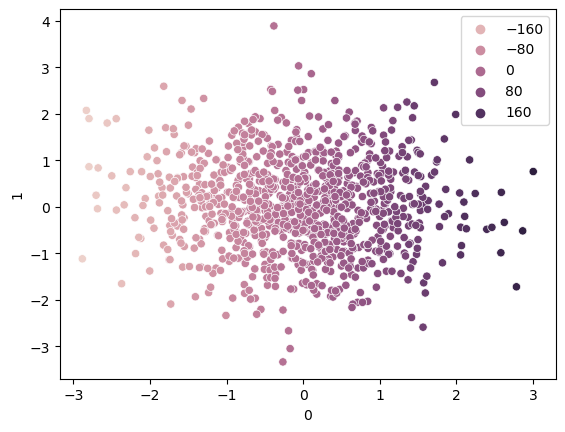

In [7]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=10) 

In [9]:
from sklearn.svm import SVR

In [10]:
svr=SVR(kernel='linear')

In [11]:
svr.fit(X_train,y_train)

SVR(kernel='linear')

In [12]:
svr.coef_ 

array([[76.0925015 ,  1.68937209]])

In [13]:
## Prediction
y_pred=svr.predict(X_test) 

In [14]:
y_pred

array([  34.99810506,   20.6785409 ,  -81.81351186,  160.19082188,
        -69.05689981,  -15.23503721,    4.56922616,  -45.30582762,
         -3.88647721, -167.45348442,   28.16916152,  -72.54740956,
        -74.67216106,  -30.87602495,   61.1621911 ,   48.51433077,
        -24.06775537,  115.55072534,  -88.99473405,  -64.22410009,
          9.71748974, -108.28997439,   10.48975768,   50.64827543,
        199.2726938 , -139.43993016,  -19.25225839,  -63.61921582,
        -51.48378415,  118.25245357,   99.97629711,  -30.60845932,
        119.2540952 ,   13.61185055,  -45.82616069,   -3.07132018,
       -183.08931135,  -59.87382326,  -17.01040764,  -56.73136064,
        142.7547019 ,  -21.24990726,  -95.42853336,  -29.73955148,
       -131.24651893,   85.93228866,  -65.71004501,   77.63571968,
         37.82292047,  112.93512498, -110.28987237,   29.59411961,
         14.53667122,   92.31805565,   35.91339437,  -31.49686133,
        -64.31911477,  -96.72203462,  100.51974905,  -68.21405

In [15]:
from sklearn.metrics import r2_score

In [16]:
print(r2_score(y_test,y_pred))

0.9986671164689411


## Hyperparametere Tuning With SVR

In [17]:
from sklearn.model_selection import GridSearchCV
 
# Defining Parameter Range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':['linear'],
              'epsilon':[0.1,0.2,0.3]
              }


In [18]:
grid=GridSearchCV(SVR(),param_grid=param_grid,refit=True,cv=5,verbose=3) 

In [20]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.840 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.835 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.835 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.840 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.847 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.840 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.835 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.835 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.840 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.847 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'epsilon': [0.1, 0.2, 0.3],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [21]:
grid.best_params_

{'C': 10, 'epsilon': 0.1, 'gamma': 1, 'kernel': 'linear'}

In [22]:
## Prediction
y_pred4=grid.predict(X_test)
print(r2_score(y_test,y_pred4)) 

0.9986460844319371
